<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Ensemble Learning. </center></h2>

In [83]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [84]:
df_X = pd.read_csv('x_train.csv', sep=';')
df_y = pd.read_csv('y_train.csv', sep=';', header=None, names=['target'])

In [85]:
X = df_X.values
y = df_y['target'].values

In [86]:
print("X shape: ", X.shape)
X[:5]

X shape:  (25289, 12)


array([[3.90000000e+01, 1.00000000e+01, 3.00000000e+00, 1.70000000e+01,
        2.44444444e+01, 1.00000000e+00, 5.00000000e+00, 4.00000000e-01,
        2.65000000e+06, 1.37500000e+03, 2.10000000e+01, 2.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 1.90000000e+01, 5.50000000e+01,
        1.70454545e+01, 1.00000000e+00, 6.00000000e+00, 3.33333333e-01,
        5.61400000e+06, 3.82500000e+03, 5.10000000e+01, 4.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 1.00000000e+00, 6.00000000e+00,
        8.40000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        8.57000000e+05, 1.15000000e+03, 1.40000000e+01, 1.00000000e+00],
       [2.10000000e+01, 2.00000000e+00, 5.00000000e+00, 6.00000000e+00,
        1.90000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.20000000e+05, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 1.00000000e+00, 5.00000000e+00,
        9.60000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00

In [87]:
print("y shape: ", y.shape)
y[:5]

y shape:  (25289,)


array([0, 1, 1, 1, 0], dtype=int64)

# Train / Test Split

In [88]:
# import train_test_split function to split the sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5,    
                                                    random_state=123) 

# Task 1 (5 points)

Implement Random Forest classifier as it was described in your lectures:

**Input**: 
* training dataset $TDS=\{(x_{i},y_{i}),\,1=1,2,...N\}$; 
* the number of trees $B$ and the size of feature subsets $m$.

for $b=1,2,...B$:

1. generate random training dataset $TDS^{b}$ of size $N$ by sampling $(x_{i},y_{i})$ pairs from $TDS$ with replacement (bootstrap)
2. build a tree using $TDS^{b}$ training dataset with feature selection for each node from random subset of features of size $m$ (generated **individually for each node**).


**Output**: $B$ trees. Classification is done using majority vote and regression using averaging of $B$ outputs

**Hints:**
- Use decision tree classifier from sklean library. You can import it with the command: `from sklearn.tree import DecisionTreeClassifier` with `max_features` option. 
- You can use `numpy.random.choice()` function to generate random subsamples to train decition tree classifiers.

### Let' s start with small steps

#### First step

Implement auxiliary function that generates K random subsamples (with replacement) of X, y of size N

In [89]:
def gen_subsamples(X, y, K, N):
    
    Xy = np.c_[X, y]
    subsamples = []
    
    for k in range(K):
        subsample_indeces = np.random.choice(a=range(len(X)), size=N, replace=True)
        subsamples.append(Xy[subsample_indeces])
    
    return subsamples

#### Second step

Implement auxiliary function which gets a list of (X,y) with lengh K and fit K base_estimators. Each estimator fits from the corresponding sample. 

In [90]:
def fit_subsamples(subsamples, base_estimator):
    
    K = len(subsamples)
    
    base_estimators = []
    
    for k in range(K):
        clf = base_estimator()
        
        k_sample = subsamples[k]
        
        X_sub = np.delete(k_sample, len(k_sample[0]) - 1, 1)
        y_sub = k_sample[:, len(k_sample[0]) - 1]
        
        clf.fit(X_sub, y_sub)
        base_estimators.append(base_estimator)
    
    return base_estimators

In [91]:
from sklearn.tree import DecisionTreeClassifier

X = X_train[0:5]
y = y_train[0:5]


subsamples = gen_subsamples(X, y, 2, 3)

for s in subsamples:
    print(s)

fit_subsamples(subsamples, DecisionTreeClassifier)

[[1.00e+00 2.00e+00 1.00e+00 2.00e+00 4.00e+00 0.00e+00 0.00e+00 0.00e+00
  2.75e+05 5.00e+02 3.00e+00 1.00e+00 0.00e+00]
 [4.50e+01 2.00e+00 3.00e+00 6.00e+00 1.40e+01 0.00e+00 0.00e+00 0.00e+00
  1.70e+05 2.50e+02 3.00e+00 1.00e+00 0.00e+00]
 [4.50e+01 2.00e+00 3.00e+00 6.00e+00 1.40e+01 0.00e+00 0.00e+00 0.00e+00
  1.70e+05 2.50e+02 3.00e+00 1.00e+00 0.00e+00]]
[[1.000e+00 2.000e+00 1.000e+00 2.000e+00 4.000e+00 0.000e+00 0.000e+00
  0.000e+00 2.750e+05 5.000e+02 3.000e+00 1.000e+00 0.000e+00]
 [9.000e+00 1.000e+01 1.000e+00 1.000e+01 1.390e+01 0.000e+00 2.000e+00
  1.000e+00 2.184e+06 1.875e+03 2.300e+01 1.000e+00 0.000e+00]
 [4.500e+01 2.000e+00 3.000e+00 6.000e+00 1.400e+01 0.000e+00 0.000e+00
  0.000e+00 1.700e+05 2.500e+02 3.000e+00 1.000e+00 0.000e+00]]


[sklearn.tree.tree.DecisionTreeClassifier,
 sklearn.tree.tree.DecisionTreeClassifier]

#### Example with multiprocessing

In [92]:
def fit(params):    
    from sklearn.tree import DecisionTreeClassifier
    X, y, size = params
    subsamples = gen_subsamples(X, y, size, X.shape[0])
    return fit_subsamples(subsamples, DecisionTreeClassifier)

In [93]:
import multiprocessing

process_count = 4
parts = [
    (X, y, 1000 // process_count)
    for i in range(process_count)
]

In [ ]:
with multiprocessing.Pool(process_count) as p:
    # every part is sent to separate processes
    clfs = p.map(fit, parts)

### And now combine it all together in one class

In [198]:
# You need to modify this class #

class RandomForestCalssifier(object):
    
    def __init__(self, n_trees=10, n_subset_features=2): # you can add more hyperparameters
        """
        This is your random forest classifier.
        
        Parameters
        ----------
        n_trees : int
            Number of decision trees to train.
        n_subset_features : int
            Number of random features used to train a decision tree.
        """
        
        self.n_trees = n_trees
        self.n_subset_features = n_subset_features
        self.base_classifiers = []
    
    
    def gen_subsamples(self, X, y, K, N):
    
        Xy = np.c_[X, y]
        subsamples = []
    
        for k in range(K):
            subsample_indeces = np.random.choice(a=range(len(X)), size=len(X), replace=True) #size=len(X)
            subsamples.append(Xy[subsample_indeces])
    
        return subsamples
    
    
    def fit_subsamples(self, subsamples, base_estimator):
    
        K = len(subsamples)
    
        base_estimators = []

        for k in range(self.n_trees):
            
            clf = base_estimator(max_features=self.n_subset_features)
            
            k_sample = subsamples[k]
        
            X_sub = np.delete(k_sample, len(k_sample[0]) - 1, 1)
            y_sub = k_sample[:, len(k_sample[0]) - 1]
        
            clf.fit(X_sub, y_sub)
               
            base_estimators.append(clf)
    
        return base_estimators
    
    
    def fit(self, X, y):
        """
        Fit the classifier.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        from sklearn.tree import DecisionTreeClassifier
        
        subsamples = self.gen_subsamples(X, y, self.n_trees, self.n_subset_features)
        
        self.base_classifiers = self.fit_subsamples(subsamples, DecisionTreeClassifier)
    
    
    def predict_proba(self, X):
        """
        This methods performs probabilities prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        proba : numpy.array, shape = (n_objects, n_classes)
            Array with predicted probabilities. 
        """
        
        classifier_probas = []
        
        # For each base classifier
        for i_clf in range(len(self.base_classifiers)):
            
            try:
                # Try to predict probabilities
                proba = self.base_classifiers[i_clf].predict_proba(X)
            except:
                continue
            # Save the probabilities
            classifier_probas.append(proba)
        
        # Convert to numpy.array
        classifier_probas = np.array(classifier_probas)
        
        # Return mean probabilities
        return classifier_probas.mean(axis=0)
    
    
    def predict(self, X):
        """
        This methods performs labels prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        labels : numpy.array, shape = (n_objects)
            1D array with predicted labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        classifier_predictions = []
        
        # For each base classifier
        for i_clf in range(len(self.base_classifiers)):
            
            # Predict class labels
            prediction = self.base_classifiers[i_clf].predict(X)
            
            # Save class labels
            classifier_predictions.append(prediction)
            
        # Convert to numpy.array
        classifier_predictions = np.array(classifier_predictions)
        
        # Estimate class labels
        prediction = 1. * (classifier_predictions.mean(axis=0) >= 0.5)
        
        return prediction

In [199]:
clf = RandomForestCalssifier(n_trees=10, n_subset_features=2)
clf.fit(X_train, y_train)

In [200]:
y_test_predict = clf.predict(X_test)

y_test_predict[:10]

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 0.])

In [201]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_test_predict)
print("Test accuracy: ", accuracy_test)

Test accuracy:  0.8018189007512851


# Task 2 (1 point)

Plot ROC curve on the test sample for your random forest classifier. Also, claculate ROC AUC value. Use `RandomForestClassifier.predict_proba()` method.

Hints:
- You can use `sklearn.metrics.roc_curve` frunction to calculate ROC curve.
- `sklearn.metrics.roc_auc_score` function helps you to calculate ROC AUC value.

RFC ROC AUC=0.843


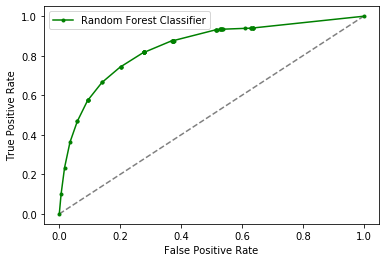

In [202]:
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt

clf = RandomForestCalssifier(n_trees=10, n_subset_features=2)
clf.fit(X_train, y_train)

random_proba = [0 for _ in range(len(y_test))]

proba = clf.predict_proba(X_test)

proba = proba[:, 1]

random_auc = roc_auc_score(y_test, random_proba)
rfc_auc = roc_auc_score(y_test, proba)

print('RFC ROC AUC=%.3f' % (rfc_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_proba)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, proba)

plt.plot(random_fpr, random_tpr, 'gray', linestyle='--')
plt.plot(rfc_fpr, rfc_tpr, 'g', marker='.', label='Random Forest Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# Task 3 (2 points)

Plot dependecy of ROC AUC value from number of trees (`n_trees`) in your random forest classifier.

Text(0, 0.5, 'ROC AUC value')

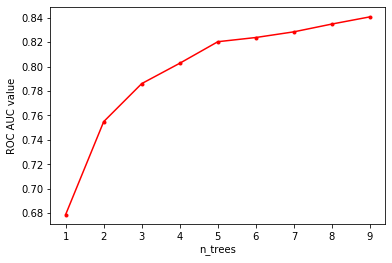

In [203]:
results = []
n_trees = list(range(1, 10))

for n in n_trees:
    clf = RandomForestCalssifier(n_trees=n)
    clf.fit(X_train, y_train)
    proba = clf.predict_proba(X_test)
    proba = proba[:, 1]
    rfc_auc = roc_auc_score(y_test, proba)
    results.append(rfc_auc)
    
line1, = plt.plot(n_trees, results, 'r', marker='.', label="ROC AUC value")

plt.xlabel('n_trees')
plt.ylabel('ROC AUC value')

# Task 4 (2 points)

Plot dependecy of ROC AUC value from `n_subset_features` of your random forest classifier. Use `n_trees=100`.

Text(0, 0.5, 'ROC AUC value')

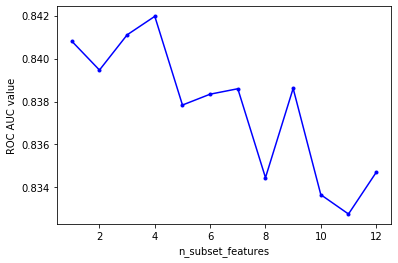

In [222]:
results = []
n_subset_features = list(range(1, 13))

for n in n_subset_features:
    clf = RandomForestCalssifier(n_subset_features=n)
    clf.fit(X_train, y_train)
    proba = clf.predict_proba(X_test)
    proba = proba[:, 1]
    rfc_auc = roc_auc_score(y_test, proba)
    results.append(rfc_auc)
    
line1, = plt.plot(n_subset_features, results, 'b', marker='.', label="ROC AUC value")

plt.xlabel('n_subset_features')
plt.ylabel('ROC AUC value')